**EJERCICIOS** 

📌El objetivo de este ejercicio no es solo hacer los gráficos si no una buena interpretación de ellos. 

Antes de empezar, haz que todas las figuras de nuestro jupyter tengan el mismo tamaño y que la columna `release_year` sea de tipo integer.  


- 1️⃣ Haz un *heatmap* y contesta a las siguientes preguntas: 

    - ¿Existe alguna relación entre el año y las valoraciones positivas y negativas?
    - ¿Existe alguna relación entre las valoraciones positivas y negativas? 
    - A parte del *heatmap*, qué otro gráfico podemos usar para visualizar la relación entre las valoraciones positivas y negativas? 


- 2️⃣ Elige el mejor gráfico para evaluar el número de tipos de entradas tenemos en nuestro *dataframe*


- 3️⃣ Ahora trabajaremos con la columna de `country`. 
    - Selecciona los paises que tengan más de 100 peliculas. 
    - ¿Cuántas películas ha creado cada pais en función del tipo?
    - ¿Cómo están distribuidos los datos para las variables de las puntuaciones, tanto positivas como negativas por país?
    - ¿Qué pasa cuando a la gráfica anterior, incluimos el efecto del tipo de película? 
    
    
- 4️⃣ Selecciona las películas del siglo XXI
    - ¿Qué año se han producido más películas? 
    - ¿Qué tipo de película se ha producido más cada año? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv("datos/netflix_titles.csv", index_col = 0)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,positive_ratings,negative_ratings
0,80190990.0,Movie,Todo Sobre El Asado,"Mariano Cohn, Gastón Duprat",El Negro Álvarez,Argentina,"September 1, 2017",2016,TV-14,86 min,"Documentaries, International Movies",This quirky examination of Argentina's culture...,14958.0,4377.0
1,81084225.0,Movie,Grego Rossello: Disculpe las molestias,Juani Libonatti,Grego Rossello,Argentina,"October 31, 2019",2019,TV-MA,65 min,Stand-Up Comedy,Argentine comedian Grego Rossello takes the st...,20548.0,6663.0


In [3]:
# convertimos la columna fecha a integer

df["release_year"] = df["release_year"].astype(int)

In [4]:
# 1️⃣ Haz un heatmap y contesta a las siguientes preguntas: 

cor = df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


C:\Users\agarc\AppData\Local\Temp\ipykernel_7952\2839603184.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


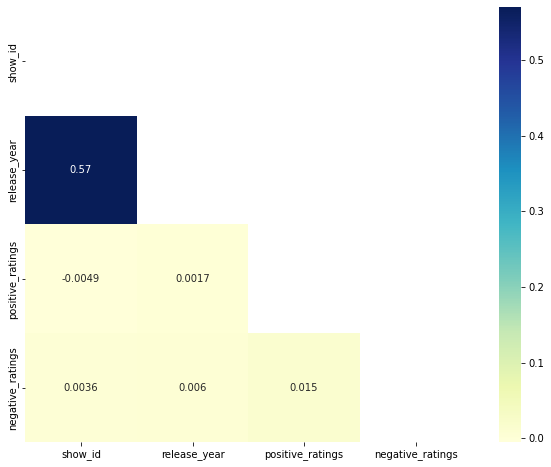

In [5]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", 
            mask = mask,
           annot = True);

En este caso, ninguna de las variables tiene correlación entre ellas. 

C:\Users\agarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


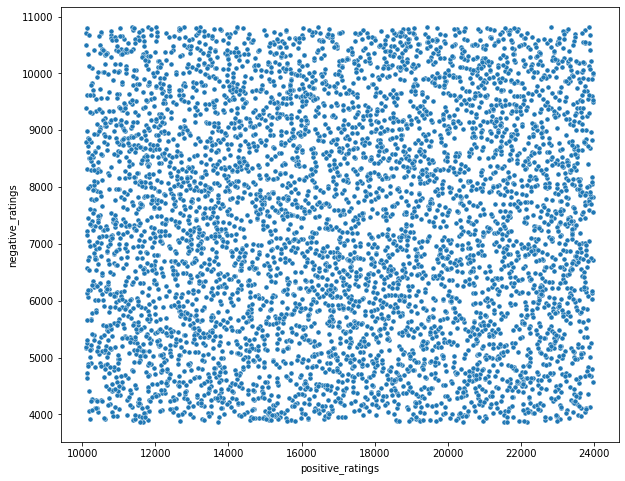

In [6]:
sns.scatterplot('positive_ratings', 'negative_ratings', data = df , s = 25)
plt.show();

No vemos ningún patrón en nuestro plot, es una nube de puntos sin más. Por lo tanto, podemos decir que no hay relación. 

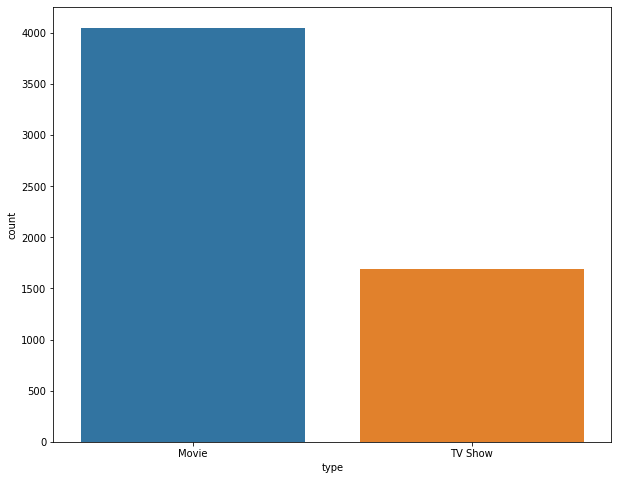

In [7]:
# 2️⃣ Elige el mejor gráfico para evaluar el número de tipos de entradas tenemos en nuestro dataframe
sns.countplot(x = "type", data = df);

In [8]:
# 3️⃣ Ahora trabajaremos con la columna de `country`

In [9]:
# seleccionamos los paises con más de 100 películas

df1 = df[df.groupby('country')['country'].transform('size') > 100]
df1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,positive_ratings,negative_ratings
237,81173255.0,Movie,The Heretics,Chad Archibald,"Nina Kiri, Ry Barrett, Jorja Cadence, Will Kin...",Canada,"September 4, 2019",2017,TV-MA,88 min,Horror Movies,A withdrawn young woman hunted by a malicious ...,19741.0,4898.0
238,70304191.0,Movie,Swearnet: The Movie,Warren P. Sonoda,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...",Canada,"September 24, 2017",2014,NR,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa...",15270.0,10196.0


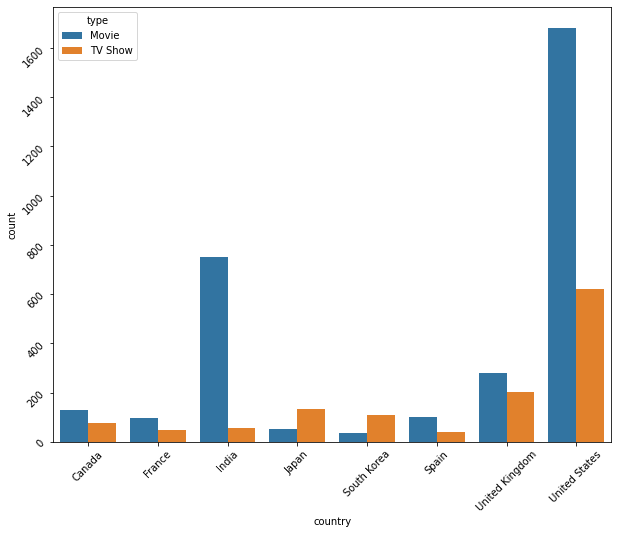

In [10]:
# sacamos las pelis por pais y tipo

fig = sns.countplot(x = "country", hue = "type", data = df1)
fig.tick_params(labelrotation=45)
plt.show();

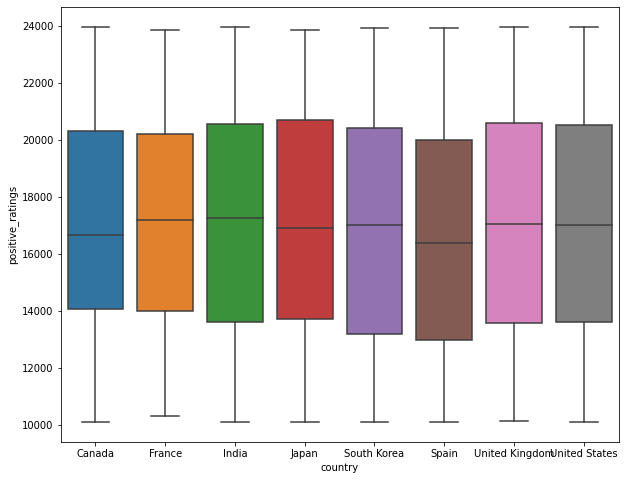

In [11]:
# como están distribuidos los datos entre paises en relación a las valoraciones positivas
sns.boxplot(x="country", y="positive_ratings", data=df1);

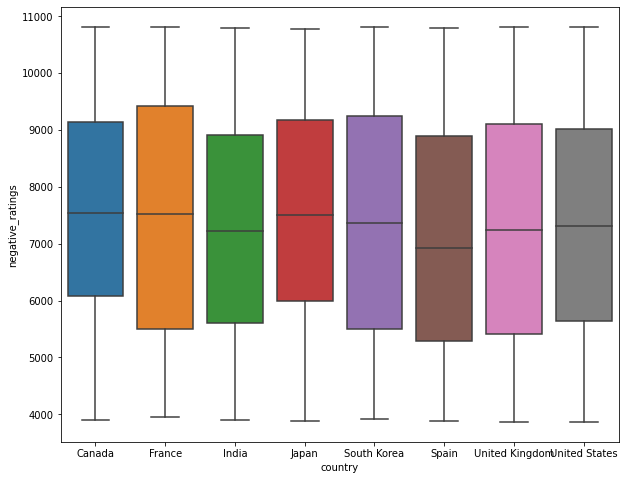

In [12]:
# como están distribuidos los datos entre paises en relación a las valoraciones negativas

sns.boxplot(x="country", y="negative_ratings", data=df1);


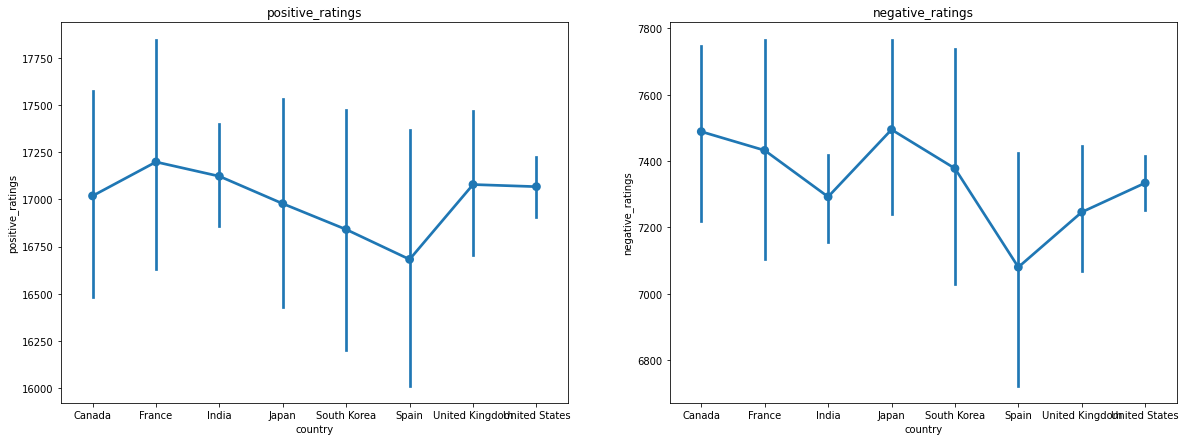

In [13]:
variables_plotear = ["positive_ratings", "negative_ratings"]
fig, axes = plt.subplots(1, 2, figsize=(20,7))

for i in range(len(variables_plotear)): 
    sns.pointplot(x = 'country', y = variables_plotear[i], data = df1 , ax = axes[i]) 
    
axes[0].set_title('positive_ratings')
axes[1].set_title('negative_ratings')

plt.show();

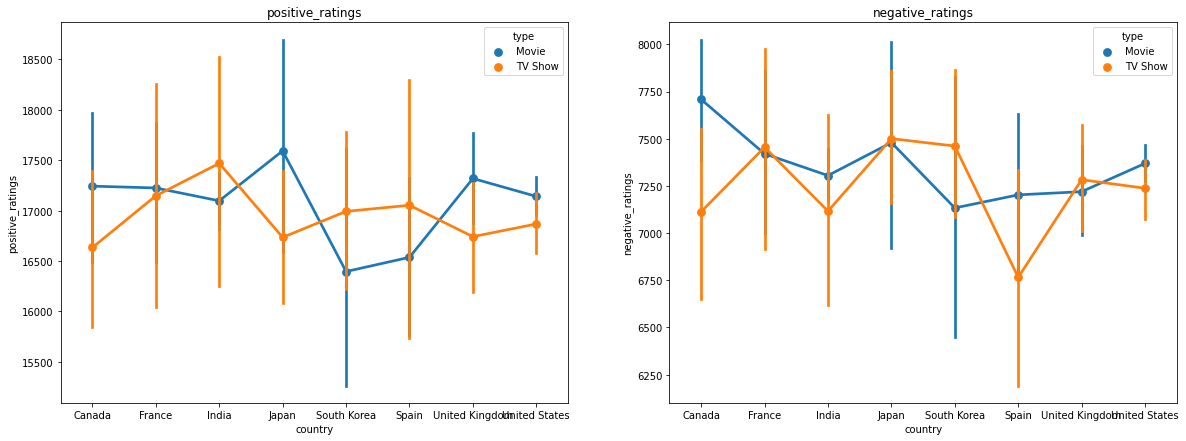

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

for i in range(len(variables_plotear)): 
    sns.pointplot(x = 'country', y = variables_plotear[i], data = df1 , hue= "type", ax = axes[i]) 
    
axes[0].set_title('positive_ratings')
axes[1].set_title('negative_ratings')

plt.show();

In [15]:
# 4️⃣ Selecciona las películas del siglo XXI

df_siglo = df[df["release_year"]>2000]
df_siglo.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,positive_ratings,negative_ratings
0,80190990.0,Movie,Todo Sobre El Asado,"Mariano Cohn, Gastón Duprat",El Negro Álvarez,Argentina,"September 1, 2017",2016,TV-14,86 min,"Documentaries, International Movies",This quirky examination of Argentina's culture...,14958.0,4377.0
1,81084225.0,Movie,Grego Rossello: Disculpe las molestias,Juani Libonatti,Grego Rossello,Argentina,"October 31, 2019",2019,TV-MA,65 min,Stand-Up Comedy,Argentine comedian Grego Rossello takes the st...,20548.0,6663.0


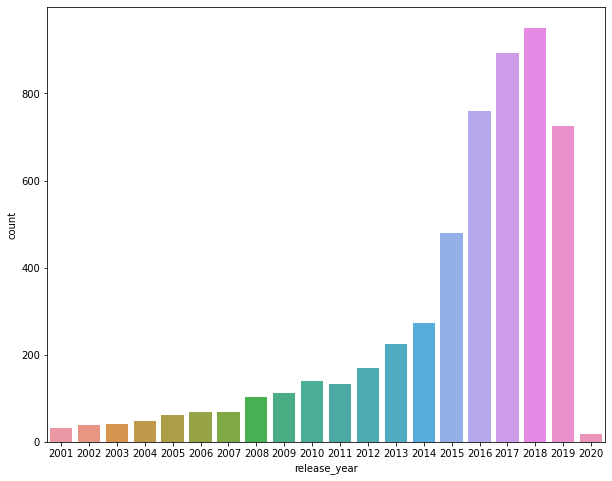

In [16]:
# en que año se han producido más peliculas

sns.countplot(x = 'release_year', data = df_siglo); 

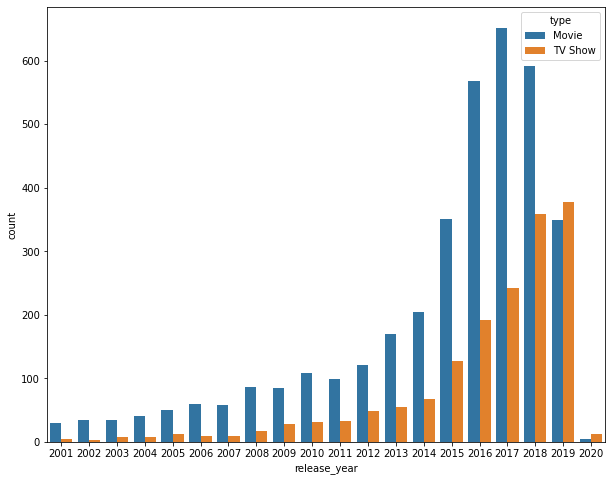

In [17]:
# qué tipo de película se ha producido más por año

sns.countplot(x = 'release_year', data = df_siglo, hue = "type"); 